# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [629]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [630]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [631]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Pain, Dr. Alfred",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [632]:
# TODO
mv = titanic.isna().sum()
a = mv.to_numpy().nonzero()
a = np.array(a).tolist()
print("Missing columns and number of records are:\n", mv[a[0]] )

Missing columns and number of records are:
 Age         177
Cabin       687
Embarked      2
dtype: int64


### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [633]:
# TODO
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Cabin'].fillna('Other',inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode(),inplace=True)

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [634]:
# TODO
titanic.sort_values('Fare', ascending=False).iloc[15,3]

'Farthing, Mr. John'

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [635]:
# TODO
titanic_q4 = titanic.loc[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1), :]
titanic_q4_sorted = titanic_q4.sort_values('Fare', ascending=False)
titanic_q4_sorted.iloc[5,3]

'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [636]:
# TODO
from pandas import * 
table = pivot_table(titanic, values=['Survived'],columns=['Pclass','Sex'], aggfunc=np.mean)
table
#Findings:
#Female generally have a higher survival rate than male across different P class. 
#However, for both genders, higher the class is,higher the survival rate will be. 

Pclass           1                   2                3          
Sex         female      male    female      male female      male
Survived  0.968085  0.368852  0.921053  0.157407    0.5  0.135447

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

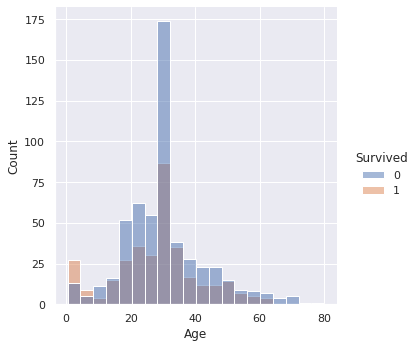

In [637]:
# TODO
sns.displot(titanic, x='Age',hue="Survived",bins = 20)
#Age doesn't have an essential impact on the survival rate besides younger kids. Kids younger than 4 years old have a higher survival rate. 

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

SibSp            0         1         2     3         4    5    8
Survived  0.345395  0.535885  0.464286  0.25  0.166667  0.0  0.0


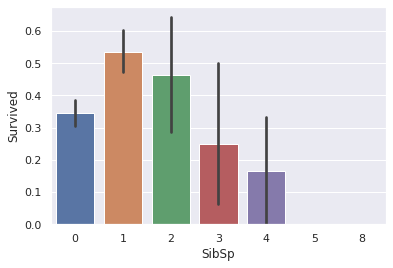

In [638]:
# TODO
#SibSp
tableSibSp = pivot_table(titanic, values=['Survived'],columns=['SibSp'], aggfunc=np.mean)
print(tableSibSp)
sns.barplot(x = 'SibSp', y= 'Survived',data = titanic)


Parch            0         1    2    3    4    5    6
Survived  0.343658  0.550847  0.5  0.6  0.0  0.2  0.0


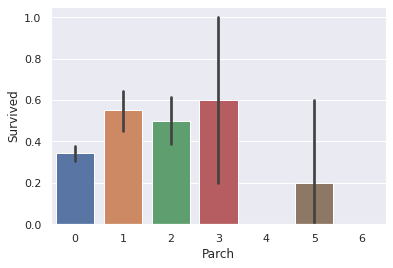

In [639]:
#Parch
tableParch = pivot_table(titanic, values=['Survived'],columns=['Parch'], aggfunc=np.mean)
print(tableParch)
sns.barplot(x = 'Parch', y= 'Survived',data = titanic)


### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

PassengerId   -0.005007
Survived       1.000000
Pclass         0.247845
Name          -0.005007
Sex            0.543351
Age            0.037025
SibSp         -0.136302
Parch          0.086210
Ticket        -0.047298
Fare           0.191981
Cabin          0.270495
Embarked       0.101849
Name: Survived, dtype: float64

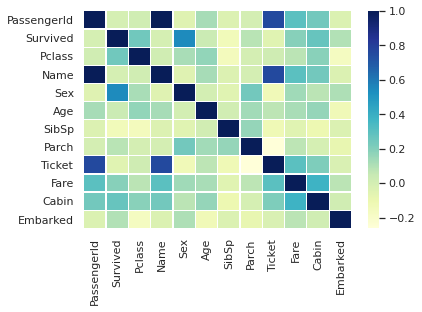

In [640]:
# TODO
corr = titanic.apply(lambda x: pd.factorize(x)[0]).corr()
display(corr.iloc[:,1])
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")
#Findings
#Sex has the correlation with Survival rate, followed by Cabin, Pclass and Fare. Social status and gender highly impact one's survival rate. 

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

Sex,female,male
Fare,44.479818,25.523893


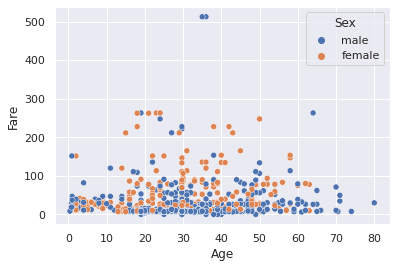

In [641]:
# TODO
sns.scatterplot(x='Age', y = 'Fare',hue='Sex', data=titanic)
tableQ9 = pivot_table(titanic, values=['Fare'],columns=['Sex'], aggfunc=np.mean)
tableQ9
#Findings
#On average, female pays more fare than male. However, the two highest priced ticket are purchased by male. 
#The tour may have a different target market for female vs male and female who purchased the ticket have a higher purchase power. 


### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [642]:
# TODO

# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import random


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

warnings.simplefilter(action='ignore', category=FutureWarning)
#train test split

data_logistic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')

In [643]:
#data preparation
data_logistic = data_logistic.drop(['Ticket', 'Cabin', 'Name','PassengerId'], axis = 1)

data_logistic['Age'].fillna(data_logistic['Age'].mean(),inplace=True)
data_logistic['Embarked'].fillna(data_logistic['Embarked'].mode()[0],inplace=True)

data_logistic['Embarked']= data_logistic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data_logistic['Sex']= data_logistic['Sex'].map( {'female': 1, 'male': 0}).astype(int)

In [644]:
#split training and test data
train_data ,test_data = train_test_split(data_logistic,test_size=0.3)    
#split target variable  
train_x = train_data.drop('Survived', axis=1)
train_y = train_data['Survived']
test_x = test_data.drop('Survived', axis=1)
test_y = test_data['Survived']


In [645]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(train_x, train_y)
print('Slope: {}'.format(logistic_regression_model.coef_))
print('Intercept: {}'.format(logistic_regression_model.intercept_))


Slope: [[-1.12990237e+00  2.65821656e+00 -4.31778038e-02 -3.83055661e-01
   2.59069289e-02  1.05833630e-03  2.58212273e-01]]
Intercept: [2.33974512]


In [646]:
train_z = logistic_regression_model.predict(train_x)
test_z = logistic_regression_model.predict(test_x)
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model accuracy on train set: {}".format(accuracy_score(test_y, test_z)))


model accuracy on train set: 0.8089887640449438
model accuracy on train set: 0.7873134328358209


In [647]:
#apply the model to test data set 
test_logistic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
test_logistic = test_logistic.drop(['Ticket', 'Cabin', 'Name','PassengerId'], axis = 1)
test_logistic.isna().sum()


Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [648]:
#survival rate result
test_logistic['Age'].fillna(test_logistic['Age'].mean(),inplace=True)
test_logistic['Fare'].fillna(test_logistic['Fare'].mean(),inplace=True)
test_logistic['Embarked']= test_logistic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test_logistic['Sex']= test_logistic['Sex'].map( {'female': 1, 'male': 0}).astype(int)
logistic_regression_model.predict(test_logistic)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [649]:
"""
#submit for Kaggle competition
submit = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
submit['Survived'] = logistic_regression_model.predict(test_logistic)
from google.colab import files
submit.to_csv('filename.csv') 
files.download('filename.csv')
"""

"\n#submit for Kaggle competition\nsubmit = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')\nsubmit['Survived'] = logistic_regression_model.predict(test_logistic)\nfrom google.colab import files\nsubmit.to_csv('filename.csv') \nfiles.download('filename.csv')\n"

In [650]:
#model improvement
dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [651]:
train_z = dt_model.predict(train_x)
train_z_prob = dt_model.predict_proba(train_x)[:,1]
test_z = dt_model.predict(test_x)
test_z_prob = dt_model.predict_proba(test_x)[:,1]
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model ROC AUC on test set: {}".format(roc_auc_score(train_y, train_z_prob)))
print("model accuracy on train set: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC on test set: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy on train set: 0.8073836276083467
model ROC AUC on test set: 0.8309833024118738
model accuracy on train set: 0.7686567164179104
model ROC AUC on test set: 0.7835659005628518


In [652]:
"""
#submit for Kaggle competition - improved model
submit = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
submit['Survived'] = dt_model.predict(test_logistic)
from google.colab import files
submit.to_csv('filename2.csv') 
files.download('filename2.csv')
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Logistic model gets score of 0.77751
Decition tree gets score of 0.76076
Logistic model is a better model for the test data. However, Decition tree gets a better result in splitted training dataset. 